In [1]:
%load_ext autoreload 
%autoreload 2

Make sure you spin up your graph database first!

```
docker run \
    -p 7474:7474 -p 7687:7687 \
    -v $PWD/data:/data -v $PWD/plugins:/plugins \
    --name neo4j-apoc \
    -e NEO4J_apoc_export_file_enabled=true \
    -e NEO4J_apoc_import_file_enabled=true \
    -e NEO4J_apoc_import_file_use__neo4j__config=true \
    -e NEO4JLABS_PLUGINS=\[\"apoc\"\] \
    neo4j:latest
```

In [2]:
import os
import sys
from dotenv import load_dotenv, find_dotenv
import warnings
import nest_asyncio

_ = load_dotenv(find_dotenv())
nest_asyncio.apply()
warnings.filterwarnings("ignore")

sys.path.append(
    "../src"
)

from graph_utils import display_graph

In [3]:
from llama_index.core import Settings
from llama_index.core.agent.workflow import FunctionAgent, AgentStream
from llama_index.llms.ollama import Ollama
from llama_index.memory.mem0 import Mem0Memory

## Setup

In [4]:
Settings.llm = Ollama("qwen3")

In [5]:
URL = "neo4j://localhost:7687"
USERNAME = "neo4j"
PASSWORD = "llamaindex"

context = {"user_id": "titus"}
config = {
    "llm": {
        "provider": "openai",
        "config": {
            "model": "gpt-4o-mini",
            "temperature": 0.2,
            "max_tokens": 2000,
        }
    },
    "embedder": {
        "provider": "ollama",
        "config": {
            "model": "nomic-embed-text",
            "embedding_dims": 768
        }
    },
    "graph_store": {
        "provider": "neo4j",
        "config": {
            "url": URL,
            "username": USERNAME,
            "password": PASSWORD,
        }
    }
}
memory = Mem0Memory.from_config(
    context = context,
    config = config,
)

## Building our agent

In [8]:
from llama_index.tools.tavily_research.base import TavilyToolSpec

tavily_tool = TavilyToolSpec(api_key=os.environ.get("TAVILY_API_KEY"))
tools = tavily_tool.to_tool_list()

search_agent = FunctionAgent(
    tools=tools,
    llm=Settings.llm,
)

In [9]:
handler = search_agent.run("Hi my name is Titus and I'm from Singapore!", memory=memory)
async for ev in handler.stream_events():
     if isinstance(ev, AgentStream):
        print(ev.delta, end="", flush=True)
response = await handler

/Users/tituslim/Documents/Personal Learning Folder/Personal Projects/glowing-enigma/.venv/lib/python3.12/site-packages/llama_index/core/workflow/events.py:70: PydanticDeprecatedSince211: Accessing the 'model_fields' attribute on the instance is deprecated. Instead, you should access this attribute from the model class. Deprecated in Pydantic V2.11 to be removed in V3.0.
  if k in self.model_fields:


<think>
Okay, the user introduced themselves as Titus from Singapore. Let me check the tools available. There's a search function, but the user didn't ask a question or request information. They just provided their name and location. Since there's no specific query, I should respond politely and ask how I can assist them. No need to call any functions here.
</think>

Hello Titus! Welcome to Singapore. How can I assist you today? 😊

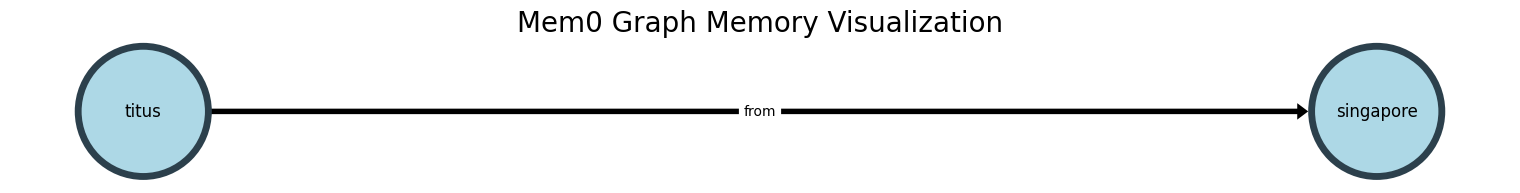

In [10]:
display_graph(uri=URL, username=USERNAME, password=PASSWORD)

In [12]:
async def invoke_agent(query: str, return_response: bool = False):
    """Main runner function to vinoke our serach agent"""
    
    handler = search_agent.run(query, memory=memory)
    async for ev in handler.stream_events():
        if isinstance(ev, AgentStream):
            print(ev.delta, end="", flush=True)
    display_graph(uri=URL, username=USERNAME, password=PASSWORD)
    
    if return_response:
        response = await handler
        return response

/Users/tituslim/Documents/Personal Learning Folder/Personal Projects/glowing-enigma/.venv/lib/python3.12/site-packages/llama_index/core/workflow/events.py:70: PydanticDeprecatedSince211: Accessing the 'model_fields' attribute on the instance is deprecated. Instead, you should access this attribute from the model class. Deprecated in Pydantic V2.11 to be removed in V3.0.
  if k in self.model_fields:


<think>
Okay, the user introduced themselves as Titus, a senior data scientist from Singapore who enjoys experimenting and writing about generative AI projects. The previous response was a friendly greeting. Now, I need to respond appropriately.

First, acknowledge their introduction and express enthusiasm about their interests. Since they mentioned generative AI, maybe offer to discuss projects or ideas. Also, since they're from Singapore, perhaps mention local tech scenes or opportunities there. Keep the tone collaborative and open for further conversation. Check if they need help with specific projects or want to share something. Make sure to invite them to ask questions or share their work. Keep it concise but welcoming.
</think>

That’s awesome to hear, Titus! As a senior data scientist passionate about generative AI, I’d love to hear about your projects or explore ideas together. Whether you’re experimenting with diffusion models, LLMs, or novel applications in Singapore’s tech e

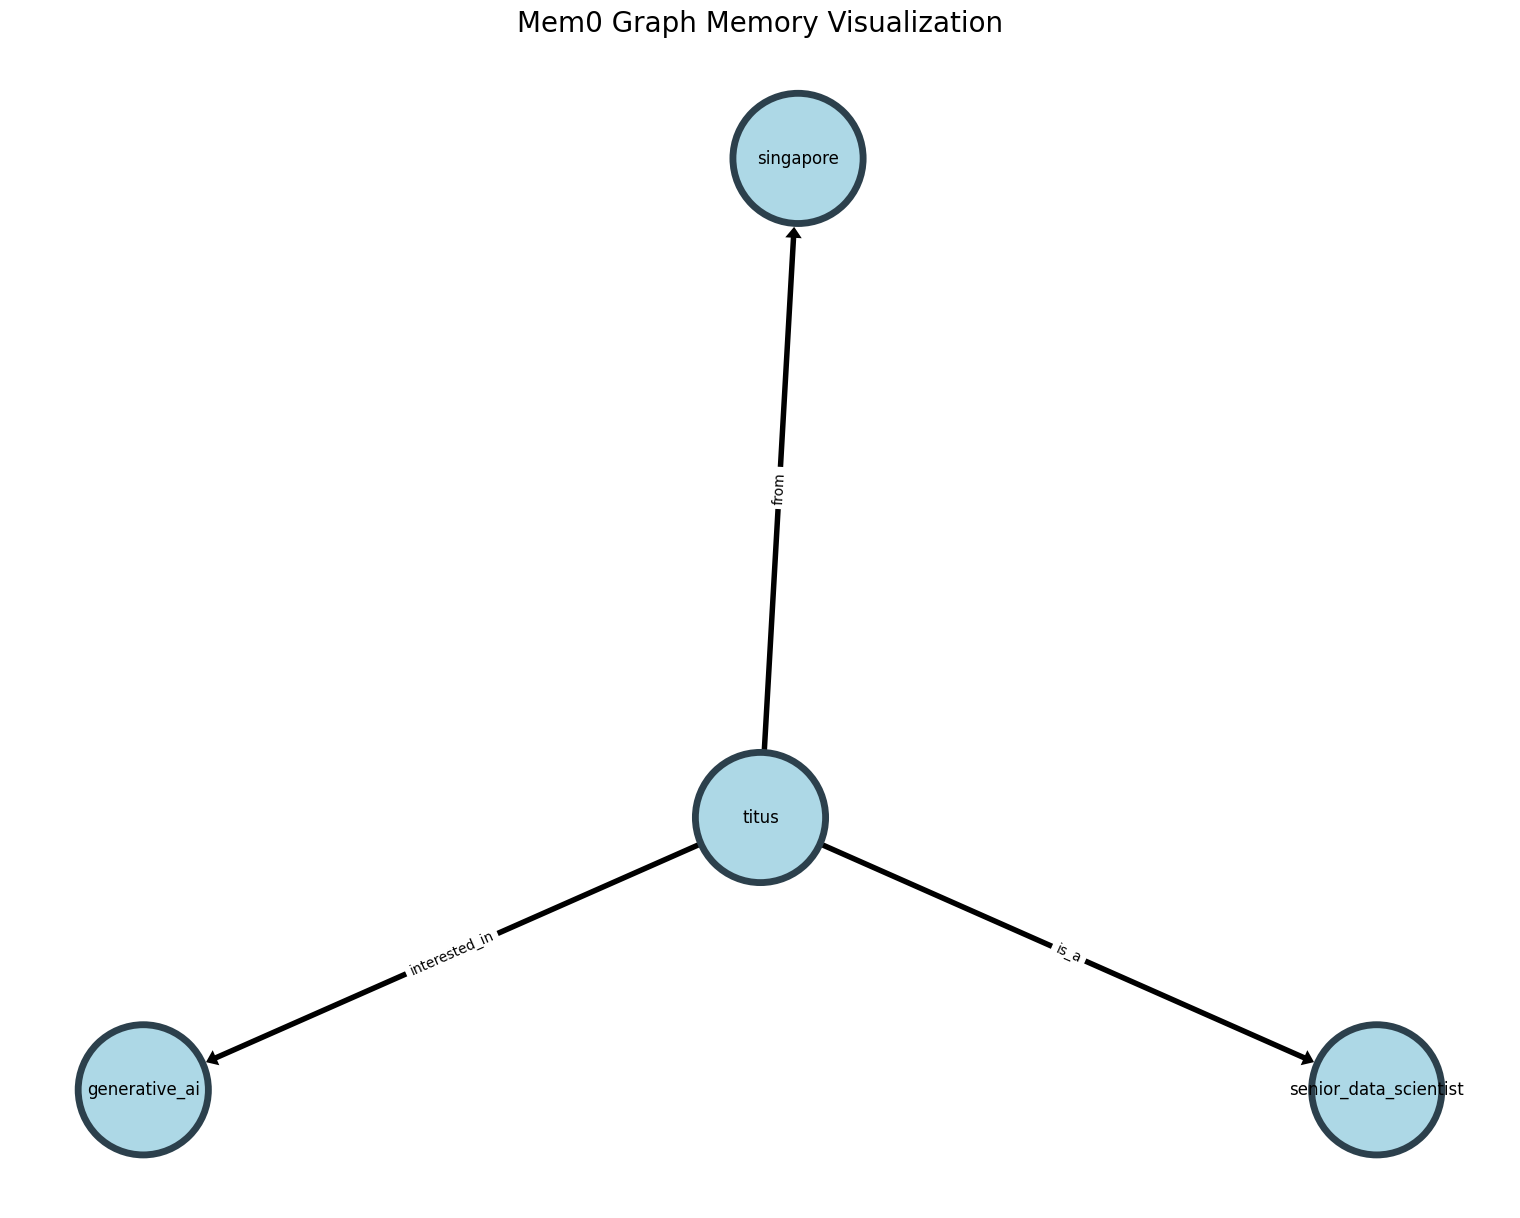

In [13]:
await invoke_agent("I'm a senior data scientist and I enjoy experimenting and writing about generative AI projects!")

/Users/tituslim/Documents/Personal Learning Folder/Personal Projects/glowing-enigma/.venv/lib/python3.12/site-packages/llama_index/core/workflow/events.py:70: PydanticDeprecatedSince211: Accessing the 'model_fields' attribute on the instance is deprecated. Instead, you should access this attribute from the model class. Deprecated in Pydantic V2.11 to be removed in V3.0.
  if k in self.model_fields:


<think>
Okay, Titus is a senior data scientist from Singapore who's interested in diving into quantum computing. He wants to know how to get started. Let me break down the best way to approach this.

First, I should consider his background. Since he's experienced in data science and machine learning, he might already have a strong foundation in programming and algorithms. Quantum computing is a new field for him, so the resources should be tailored to someone with his background but new to the quantum realm.

I need to outline the steps he should take. Starting with the basics makes sense. Quantum mechanics concepts are essential, but he might not need to dive too deep into the physics. Maybe recommend some introductory courses or books that explain the necessary physics without getting too technical.

Next, he'll need to learn quantum computing fundamentals. Platforms like Qiskit and Cirq are popular for beginners. Since he's in Singapore, maybe there are local resources or meetups. A

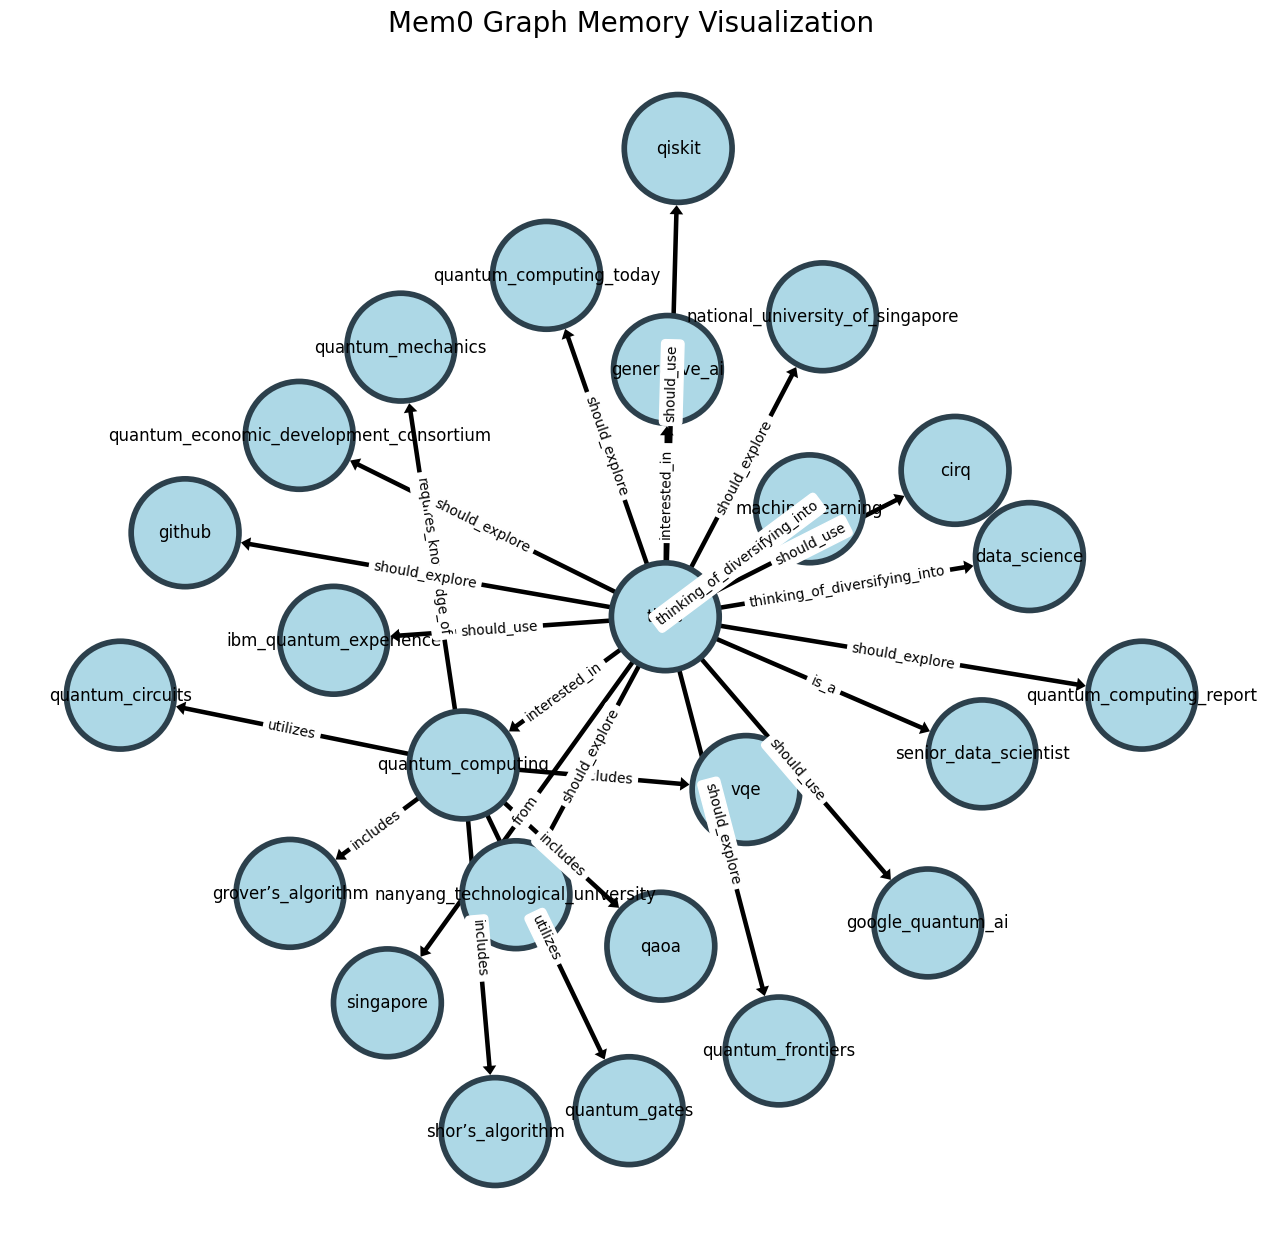

In [14]:
await invoke_agent(
    """
    Let's talk about that later. I'm thinking of diversifying my skillsets beyond machine learning and data science into adjacent fields.
    I keep hearing plenty of buzz in the quantum computing space. How do I get started with quantum computing?
    """
)

/Users/tituslim/Documents/Personal Learning Folder/Personal Projects/glowing-enigma/.venv/lib/python3.12/site-packages/llama_index/core/workflow/events.py:70: PydanticDeprecatedSince211: Accessing the 'model_fields' attribute on the instance is deprecated. Instead, you should access this attribute from the model class. Deprecated in Pydantic V2.11 to be removed in V3.0.
  if k in self.model_fields:


<think>
Okay, Titus is a senior data scientist in Singapore, and he's considering the job market for data scientists in 2025. He's also interested in quantum computing and diversifying his skills. Let me break down how to approach his query.

First, he wants to know if being a data scientist is a good career choice in 2025. I need to address the growth of the field, demand, and potential challenges. Since he's in Singapore, I should focus on the local job market there. 

Next, he asked for an overview of the Singapore job market for data scientists in 2025. I should look into factors like industry demand, salary trends, required skills, and maybe even emerging areas like quantum computing that could influence the market. 

I remember he mentioned wanting to diversify into quantum computing, so maybe there's a connection between his current role and future opportunities. I should highlight how skills in data science can complement quantum computing, making him a valuable candidate. 

I 

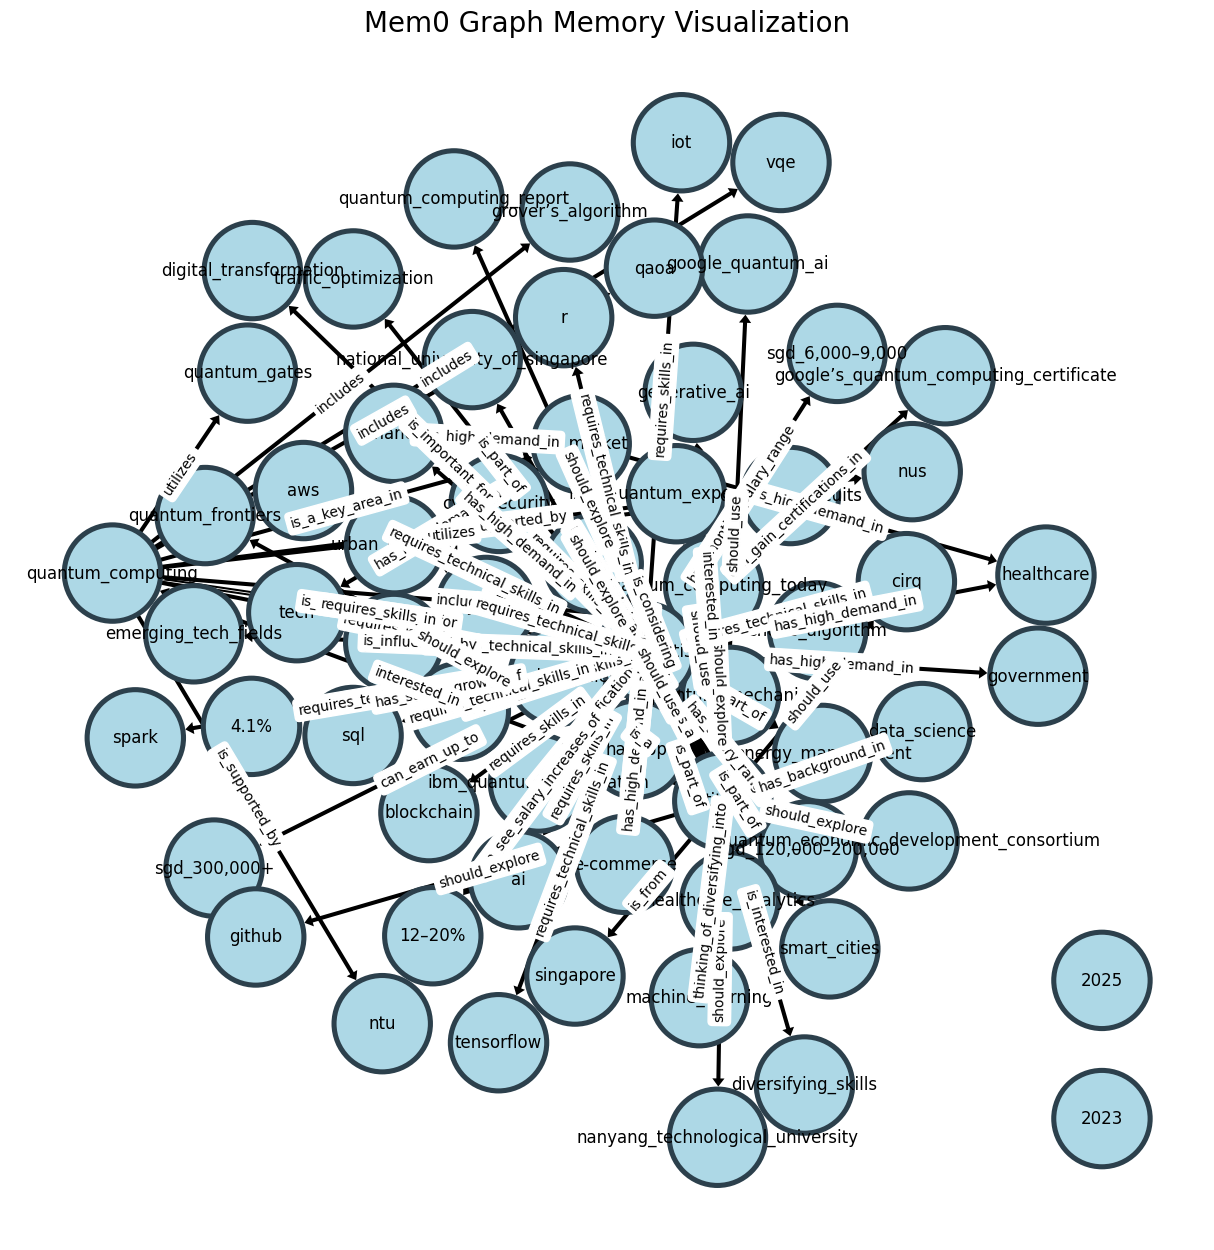

In [15]:
await invoke_agent(
    """
    Is a data scientist's job a good career choice in 2025? Can you give me an overview of the Singapore job market for data scientists in 2025? 
    """
)

At this point you're basically seeing...nothing. 

In [17]:
memory._client.get_all(user_id="titus")

{'results': [{'id': '0cc4b2ef-5d61-49b7-b325-37fcd6ea4161',
   'memory': 'Is interested in quantum computing',
   'hash': '6234a816f3f17051fbd6d1e82223d6a3',
   'metadata': None,
   'created_at': '2025-06-13T23:22:22.472209-07:00',
   'updated_at': None,
   'user_id': 'titus'},
  {'id': '115cb132-1572-4226-a445-e4f7c8d2b3fa',
   'memory': 'User is interested in the job market for data scientists in Singapore in 2025',
   'hash': 'bd847d6098cf35d34b7cc083896023ae',
   'metadata': None,
   'created_at': '2025-06-13T23:20:54.210425-07:00',
   'updated_at': '2025-06-13T23:22:22.396100-07:00',
   'user_id': 'titus'},
  {'id': '2d3abc47-b5c5-4d36-b2ee-5a6b8d810f5b',
   'memory': 'Name is Titus',
   'hash': '2a4ac2820e2c7179b5ea4bd944795050',
   'metadata': None,
   'created_at': '2025-06-13T23:12:58.463567-07:00',
   'updated_at': None,
   'user_id': 'titus'},
  {'id': '554b3d38-8373-4e81-9d56-4c4cb3bcaf04',
   'memory': 'Enjoys experimenting and writing about generative AI projects',
   'ha

In [20]:
memory.primary_memory

ChatMemoryBuffer(chat_store=SimpleChatStore(store={'chat_history': [ChatMessage(role=<MessageRole.USER: 'user'>, additional_kwargs={}, blocks=[TextBlock(block_type='text', text="Hi my name is Titus and I'm from Singapore!")]), ChatMessage(role=<MessageRole.ASSISTANT: 'assistant'>, additional_kwargs={'tool_calls': [], 'thinking': ''}, blocks=[TextBlock(block_type='text', text="<think>\nOkay, the user introduced themselves as Titus from Singapore. Let me check the tools available. There's a search function, but the user didn't ask a question or request information. They just provided their name and location. Since there's no specific query, I should respond politely and ask how I can assist them. No need to call any functions here.\n</think>\n\nHello Titus! Welcome to Singapore. How can I assist you today? 😊")]), ChatMessage(role=<MessageRole.USER: 'user'>, additional_kwargs={}, blocks=[TextBlock(block_type='text', text="I'm a senior data scientist and I enjoy experimenting and writing a

Now let's reset the memory!

In [21]:
memory.reset()

In [22]:
memory.primary_memory

ChatMemoryBuffer(chat_store=SimpleChatStore(store={}), chat_store_key='chat_history', token_limit=3000, tokenizer_fn=functools.partial(<bound method Encoding.encode of <Encoding 'cl100k_base'>>, allowed_special='all'))

And now let's go again!

/Users/tituslim/Documents/Personal Learning Folder/Personal Projects/glowing-enigma/.venv/lib/python3.12/site-packages/llama_index/core/workflow/events.py:70: PydanticDeprecatedSince211: Accessing the 'model_fields' attribute on the instance is deprecated. Instead, you should access this attribute from the model class. Deprecated in Pydantic V2.11 to be removed in V3.0.
  if k in self.model_fields:


<think>
Okay, let me try to figure out how to respond to Titus's question. He asked, "Do you still remember what I do for a living?" First, I need to recall the preferences provided earlier. Titus is a senior data scientist based in Singapore, interested in the job market for data scientists in 2025. He enjoys generative AI projects, is into quantum computing, and wants to diversify his skills beyond data science into adjacent fields. He's considering the job market in 2025 and wants to get started with quantum computing.

Now, the user is asking if I remember his profession. From the preferences, it's clear he's a senior data scientist. But maybe he wants to confirm if I've retained that information or if there's more to his role. Since the previous interactions might have covered his interests, but perhaps he's looking for a deeper understanding or if there's any new information I should be aware of. However, since the tools provided are for searching, maybe he expects me to use the 

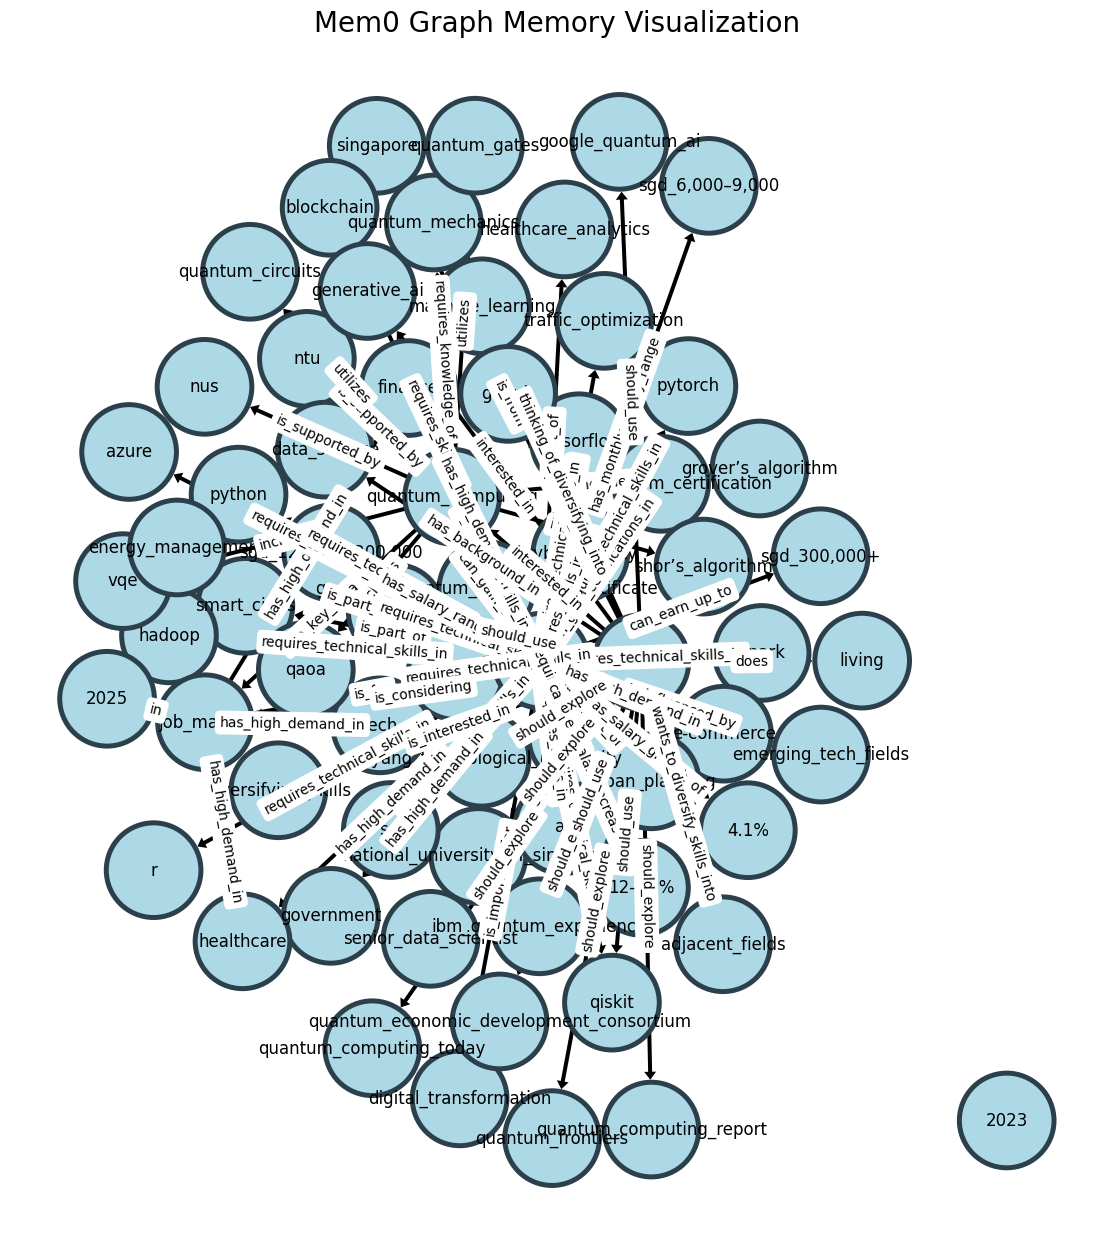

In [23]:
handler = search_agent.run(
    "Do you still remember what I do for a living?", 
    memory=memory)

async for ev in handler.stream_events():
    if isinstance(ev, AgentStream):
        print(ev.delta, end="", flush=True)
display_graph(uri=URL, username=USERNAME, password=PASSWORD)

It remembers!